In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
density = [0.1*x for x in range(10,0,-1)]
deff = pd.DataFrame({"Density":density})
d = deff["Density"]

b_val = 16
b_delta = 4

z = (1-d)**(2**b_delta)

deff["CSR32"] = d*(b_val+32)/b_val
deff["CSR16"] = d*(b_val+16)/b_val
deff["MACKO best"] = d*(b_val+b_delta)/b_val
deff["MACKO expected"] = d*(1+z/(1-z))*(b_val+b_delta)/b_val
deff["MACKO worst"] = (d+(1-d)/(2**b_delta))*(b_val+b_delta)/b_val


In [3]:
print(deff.round(3).to_markdown(index=False))


|   Density |   CSR32 |   CSR16 |   MACKO best |   MACKO expected |   MACKO worst |
|----------:|--------:|--------:|-------------:|-----------------:|--------------:|
|       1   |     3   |     2   |        1.25  |            1.25  |         1.25  |
|       0.9 |     2.7 |     1.8 |        1.125 |            1.125 |         1.133 |
|       0.8 |     2.4 |     1.6 |        1     |            1     |         1.016 |
|       0.7 |     2.1 |     1.4 |        0.875 |            0.875 |         0.898 |
|       0.6 |     1.8 |     1.2 |        0.75  |            0.75  |         0.781 |
|       0.5 |     1.5 |     1   |        0.625 |            0.625 |         0.664 |
|       0.4 |     1.2 |     0.8 |        0.5   |            0.5   |         0.547 |
|       0.3 |     0.9 |     0.6 |        0.375 |            0.376 |         0.43  |
|       0.2 |     0.6 |     0.4 |        0.25  |            0.257 |         0.312 |
|       0.1 |     0.3 |     0.2 |        0.125 |            0.153 |         

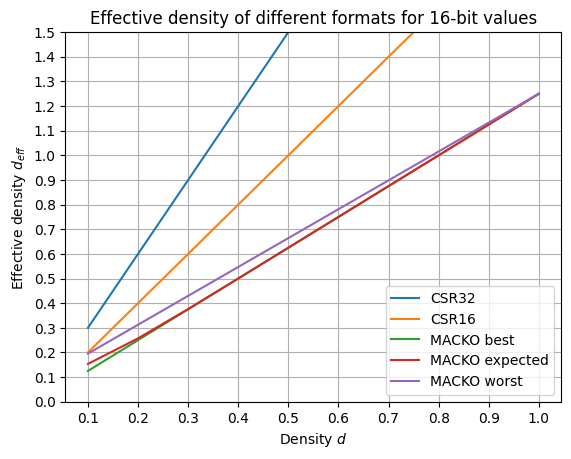

In [4]:
y_ticks = [0.1*x for x in range(16)]

deff.plot(
    x="Density", 
    xticks=deff["Density"], 
    yticks=y_ticks,
    ylabel="Effective density $d_{eff}$",
    ylim=(min(y_ticks),max(y_ticks)),
    title=f"Effective density of different formats for {b_val}-bit values",
    xlabel="Density $d$")

plt.grid()
plt.savefig(f"../media/{b_val}bit_effective_density.svg")
plt.savefig(f"../media/{b_val}bit_effective_density.png")



In [42]:
density = [0.01*x for x in range(100,9,-1)]
density_ticks = [0.1*x for x in range(10,0,-1)]
deff = pd.DataFrame({"Density":density})
d = deff["Density"]

b_val = 16
b_delta = 4

z = (1-d)**(2**b_delta)

deff["CSR32"] = d*(b_val+32)/b_val
deff["Tiled-CSL/CSR16"] = d*(b_val+16)/b_val
#deff["MACKO best"] = d*(b_val+b_delta)/b_val
deff["MACKO"] = d*(1+z/(1-z))*(b_val+b_delta)/b_val
#deff["MACKO worst"] = (d+(1-d)/(2**b_delta))*(b_val+b_delta)/b_val
deff["Bitmask"] = d + 1/b_val
deff["SparTA"] = d + 1/b_val + (d**3)*(32/b_val)



In [43]:
deff

,Density,CSR32,Tiled-CSL/CSR16,MACKO,Bitmask,SparTA
0,1.00,3.00,2.00,1.250000,1.0625,3.062500
1,0.99,2.97,1.98,1.237500,1.0525,2.993098
2,0.98,2.94,1.96,1.225000,1.0425,2.924884
3,0.97,2.91,1.94,1.212500,1.0325,2.857846
4,0.96,2.88,1.92,1.200000,1.0225,2.791972
...,...,...,...,...,...,...
86,0.14,0.42,0.28,0.192209,0.2025,0.207988
87,0.13,0.39,0.26,0.182118,0.1925,0.196894
88,0.12,0.36,0.24,0.172283,0.1825,0.185956
89,0.11,0.33,0.22,0.162716,0.1725,0.175162


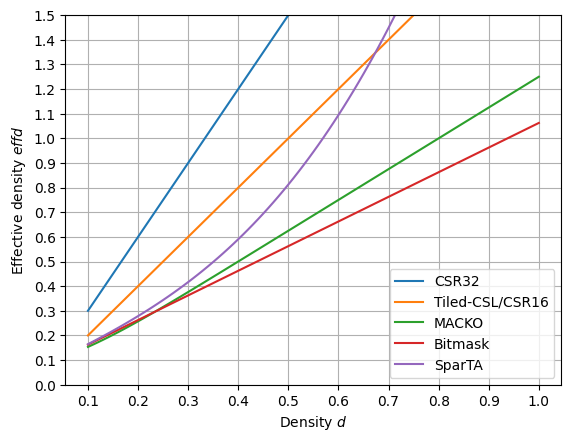

In [44]:
y_ticks = [0.1*x for x in range(16)]

deff.plot(
    x="Density", 
    xticks=density_ticks, 
    yticks=y_ticks,
    ylabel="Effective density $effd$",
    ylim=(min(y_ticks),max(y_ticks)),
    title=f"",
    xlabel="Density $d$")

plt.grid()
plt.savefig(f"../media/paper/effective_density.pdf")



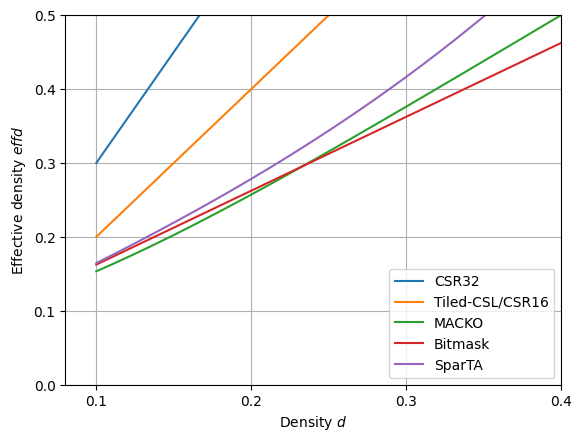

In [46]:
y_ticks = [0.1*x for x in range(16)]

deff.plot(
    x="Density", 
    xticks=density_ticks, 
    yticks=y_ticks,
    ylabel="Effective density $effd$",
    ylim=(0.00, 0.5),
    xlim=(0.08, 0.4),
    title=f"",
    xlabel="Density $d$")

plt.grid()
plt.savefig(f"../media/paper/effective_density_zoom.pdf")
